# Predicting the compressive strength of concrete
## Introduction

Concrete quality is typically defined by it's compressive strength. Civil engineers will carry out rigorous testing using varying combinations of raw materials and curing time. The process of testing concrete compressive strength can be found [here](http://www.civilengineeringforum.me/compressive-strength-test-of-concrete/). With curing time taking up to 91 days in some cases, the whole process is very time consuming and labour intensive.

There is a clear opportunity for digital simulation to reduce wait time and total number of combinations. With the data set acquired we can learn about the relations between variables and develop a predictive model. Highlighting potentially optimal combinations to then be used in physical testing will provide enormous benefit and significantly reduce labour and testing costs.

## Data Collection

In this project we will be using the [Concrete Compressive Strength data set](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength) from the UCI Machine Learning Repository.

The data contains over 1,000 instances of concrete each with 9 variables (including compressive strength).

## Initial Setup and Checks

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
df = pd.read_excel('Concrete_Data.xls')

In [6]:
df.shape

(1030, 9)

In [7]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

Thankfully data does not contain any missing values so there is no need for imputing. However, the field titles are overly descriptive for our purposes so let's rename them to be more succinct.

In [9]:
updated_col_names = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
                     'Coarse Aggregrate', 'Fine Aggregate', 'Age', 'Compressive Strength']

df.columns = updated_col_names

## Exploratory Data Analysis
The first, and arguably most important, step in a data science project is to explore the data in an attempt to gain insights that will guide the rest of the project. EDA generally includes ensuring the data is clean and usable, visualising features and their relationships, observing distributions, etc.

First of all, let's check the disribution of our target variable and take a closer look at the input features and try to identify any correlations.

In [10]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregrate,Fine Aggregate,Age,Compressive Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


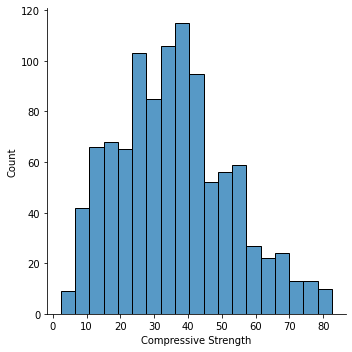

In [31]:
sns.displot(df['Compressive Strength'])

The distribution looks close to normal so no need to make any changes here.

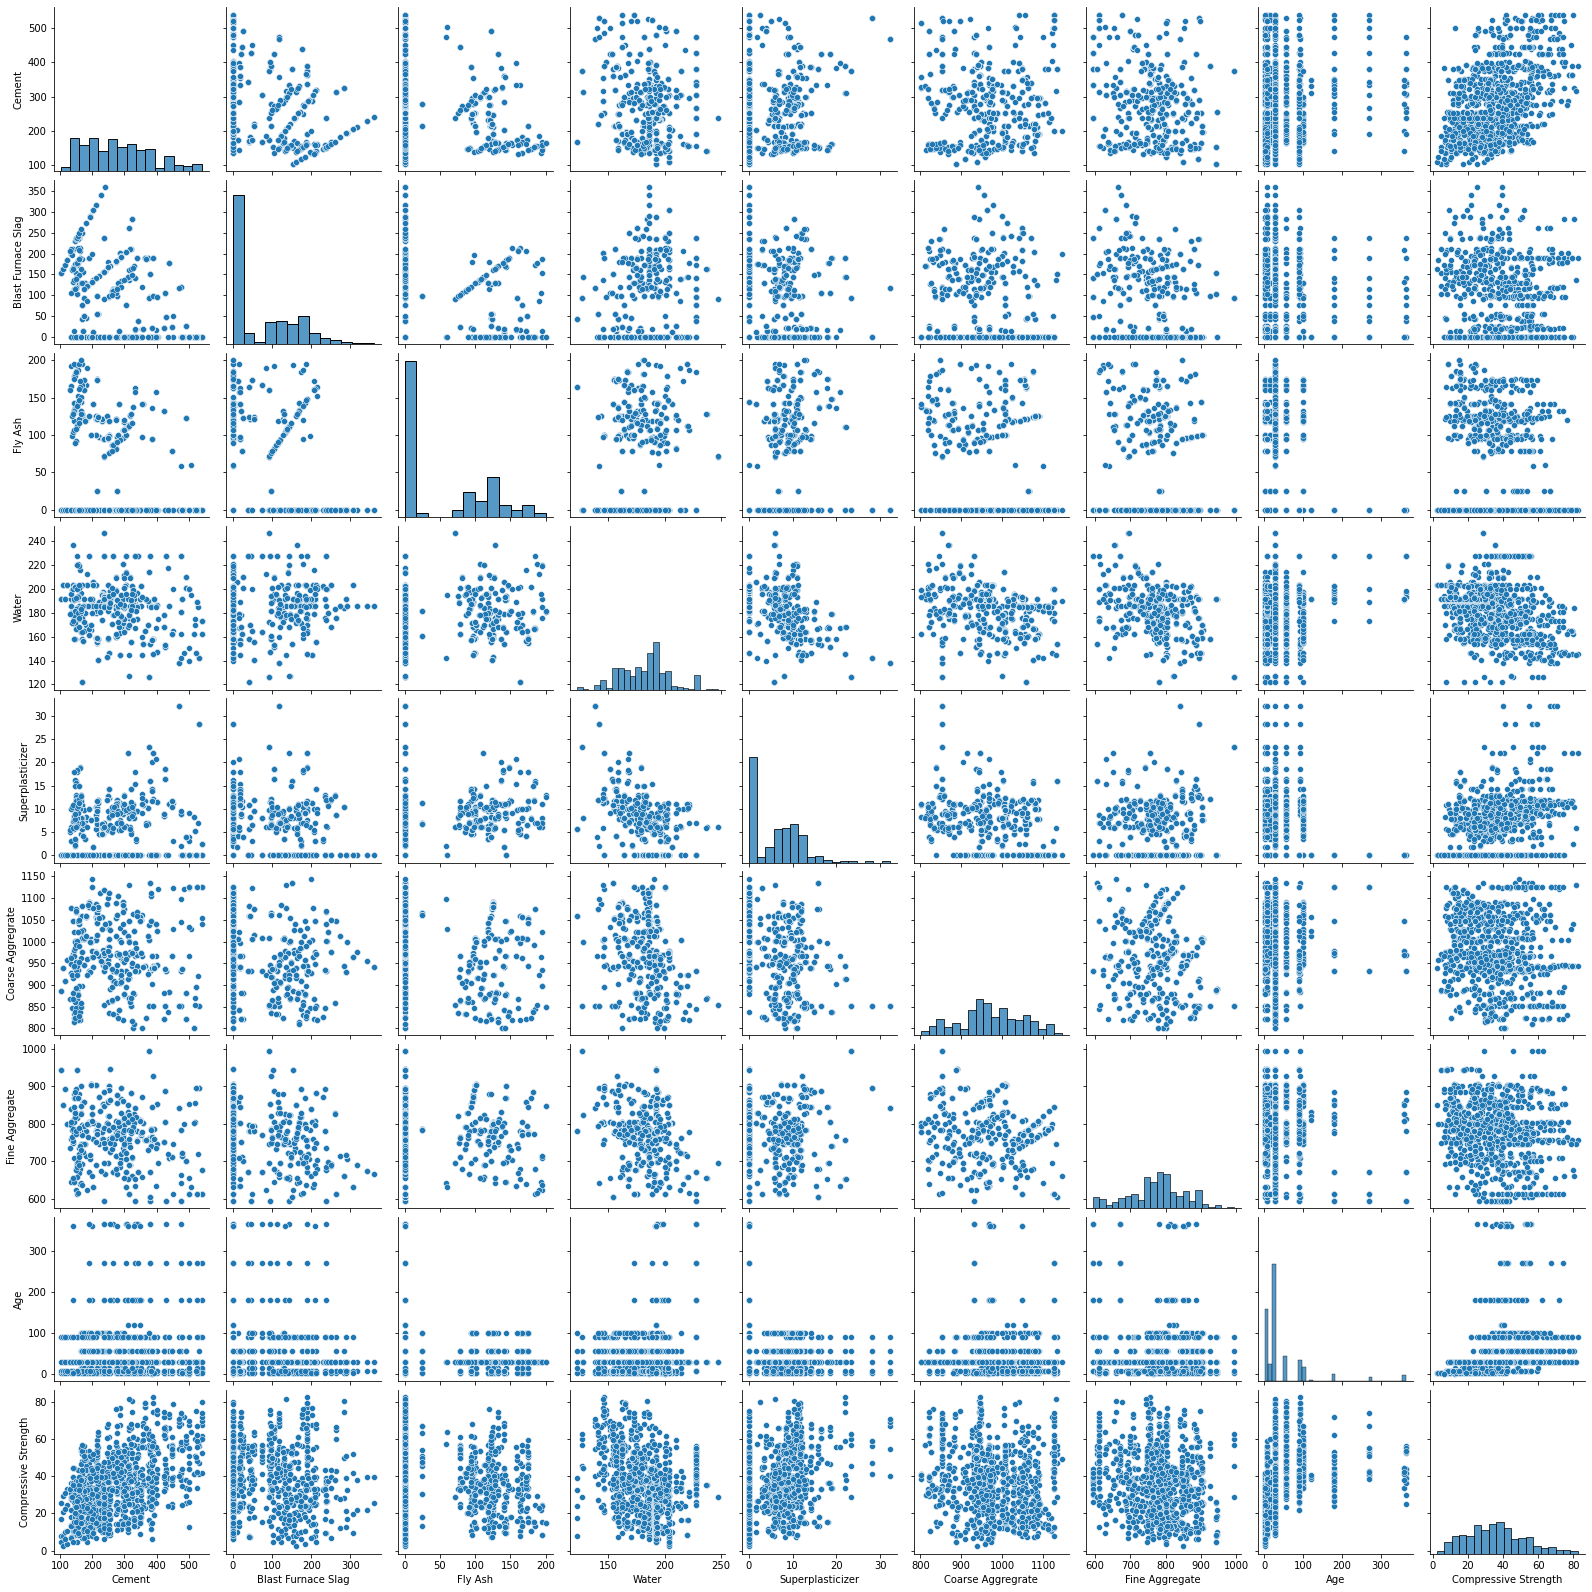

In [12]:
sns.pairplot(df)
plt.show()

At first glance, there doesn't seem to be any high correlation between any 2 features. Although Cement and Compressive Strength look like they may have some correlation. Let's determine the Pearson Correlation coefficients to get a numerical value of the strength of the correlations.

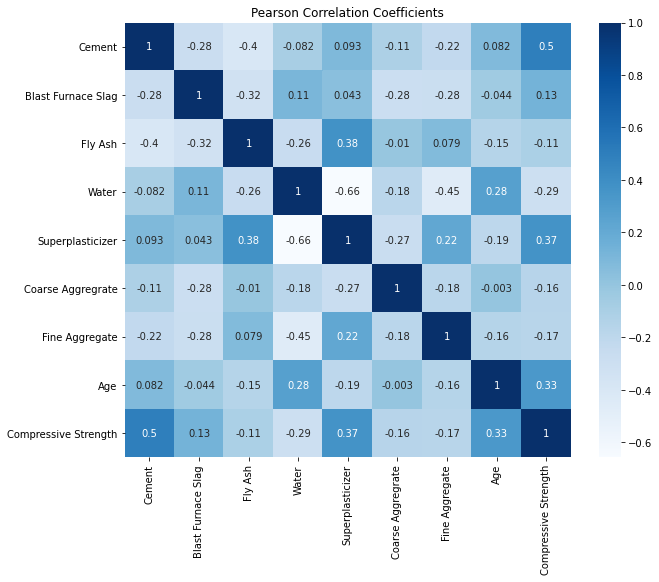

In [13]:
corr = df.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr, cmap = 'Blues', annot = True)
plt.title('Pearson Correlation Coefficients')
plt.show()

As expected, the highest positive correlations is between **Compressive Strength** and **Cement**. 

**Age** and **Superplasticizer** also have a positive impact on the **Compressive Strength**.  

By sorting for the largest magnitude values (both positive and negative) we can focus on the strong correlations with the target variable, and the strong correlations between other features.

In [14]:
corr_sorted = corr.unstack().sort_values(kind='quicksort', ascending = False)

In [15]:
print(corr_sorted[corr_sorted!=1].head(10))
print(corr_sorted[corr_sorted!=1].tail(10))

Cement                Compressive Strength    0.497833
Compressive Strength  Cement                  0.497833
Fly Ash               Superplasticizer        0.377340
Superplasticizer      Fly Ash                 0.377340
                      Compressive Strength    0.366102
Compressive Strength  Superplasticizer        0.366102
Age                   Compressive Strength    0.328877
Compressive Strength  Age                     0.328877
Water                 Age                     0.277604
Age                   Water                   0.277604
dtype: float64
Compressive Strength  Water                  -0.289613
Water                 Compressive Strength   -0.289613
Blast Furnace Slag    Fly Ash                -0.323569
Fly Ash               Blast Furnace Slag     -0.323569
                      Cement                 -0.397475
Cement                Fly Ash                -0.397475
Fine Aggregate        Water                  -0.450635
Water                 Fine Aggregate         -0.45

As expected, there aren't many high correlations with Compressive Strength (CS). The only significant ones are the following 3 top features.

|Feature|Correlation w/ CS|
|:---|:---|
|Cement|0.50|
|Superplasticizer|0.37|
|Age|0.33|

Looking at the top 3 with the highest negative correlation, perhaps water could be a useful variable, Fine Aggregate and Age are unlikely to be helpful in isolation.  

|Feature|Correlation w/ CS|
|:---|:---|
|Water|-0.29|
|Fine Aggregate|-0.17|
|Age|-0.16|

Some other notable strong correlations include the following.

|Features|Correlation|
|:---|:---|
|Superplasticizer / Water|-0.66|
|Fine Aggregate / Water|-0.45|
|Cement / Fly Ash|-0.40|
|Fly Ash / Superplasticizer|0.38|

Already we can determine the 3 most postive and negative influences on Compressive Strength.

Additionally, there are strong correlations between some of the feature variables. We can see a highly negative correlation between **Superplasticizer** and **Water**, but a positive correlation between **Superplasticizer** and **Fly Ash**.

Perhaps plotting these relationships in a visual way will help to gain more insight.

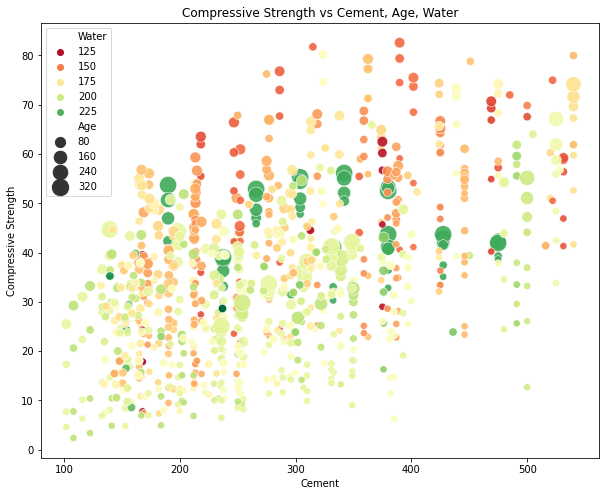

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(y="Compressive Strength", x="Cement", hue="Water", size="Age", data=df, ax=ax, sizes=(50, 300),
                palette='RdYlGn', alpha=0.9)
ax.set_title("Compressive Strength vs Cement, Age, Water")
ax.legend()
plt.show()

From this plot we can make some sensible observations on the relationships between these variables and compressive strength:  

* **Compressive Strength** correlates positively with **Cement**
* **Compressive Strength** correlates positively with **Age**, though less than **Cement**
* Older **Cement** tends to require more **Water**, as shown by the larger green data points
* **Compressive Strength** correlates negatively with **Water**
* High **Compressive Strength** with a low **Age** requires more **Cement**

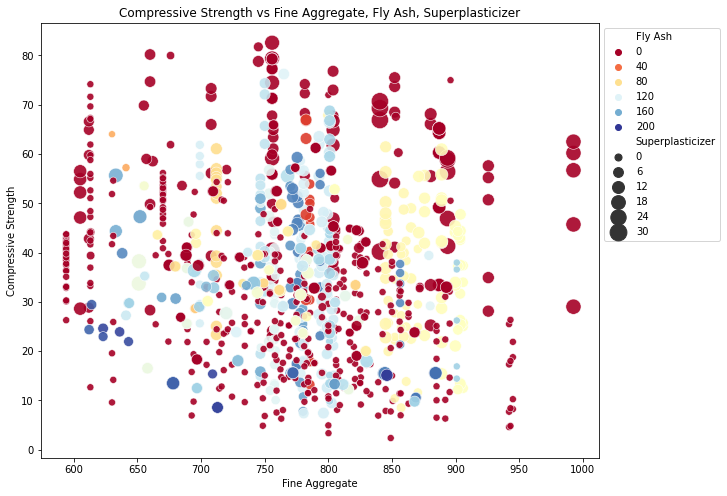

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(y="Compressive Strength", x="Fine Aggregate", hue="Fly Ash", size="Superplasticizer", data=df, ax=ax, sizes=(50, 300),
                palette='RdYlBu', alpha=0.9)
ax.set_title("Compressive Strength vs Fine Aggregate, Fly Ash, Superplasticizer")
ax.legend(loc="upper left", bbox_to_anchor=(1,1)) # Moved outside the chart so it doesn't cover any data
plt.show()

From this plot we can make further observations on the relationships between this second set of variables and compressive strength:  

* **Compressive strength** correlates negatively with **Fly Ash**
* **Compressive strength** correlates positively with **Superplasticizer**

Through some very simple charts we have discovered relationships between ingredients that allow us to make predictions on what our future model will value when seeking a high compressive strength.  

It is likely that the ideal concrete mixture (when prioritising compressive strength) will consist of:

* Large quantity of **Cement**
* Potentially a long aging process however this comes at the cost of adding **Water**, which negatively impacts the strength
* Large quantity of **Superplasticizer**

## Data Preparation
Prior to fitting a machine learning model, steps must be taken to prepare the data to get the most out of the models.

* Splitting data into train and test sets ensures that we evaluate our model on unseen data.
* Scaling the features to have a mean residing at 0 and a standard deviation of 1 helps to bring a consistency to our variables. This stops the model putting higher weights on greater values, and vice versa.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
# Splitting the features and target variable

cols = df.columns.drop('Compressive Strength')
X = df[cols]
y = df['Compressive Strength']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

Now that the data is prepared, we can fit different models on the training data and compare their performance on predicting the test data. To evaluate the models we'll use a variety of metrics suitable to a regression problem like this.

This diagram from the [scikit-learn website](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) can be helpful tool when it comes to deciding which models to initially compare.

![Machine Learning Map](ml_map.png)

Since we "predicting a quantity" we are solving a regression problem. We also have less than 100k samples so **Lasso** and **Elastic Net** are the recommended estimators. Just to cover the basics and completeness, we'll also throw in basic **Linear Regression** and **Ridge**

## Linear Regression

In this section we will evaluate 4 different linear regression models:
* Simple
* Ridge
* Lasso 
* Elastic Net 

### Simple (Ordinary Least Squares)
As the hallmark of any regression problem, linear regression is a simple but effective way of making predictions when you expect your data to have mostly linear relationships.

$$
y = \alpha + \beta x = \sum_{i=0}^{n} \alpha + \beta_i x_i
$$

Where $y$ is the target variable we are looking to predict, we use each feature variable ($x_i$) multiplied by a coefficient ($\beta_i$) plus the consistent error ($\alpha$).

Sometimes the Ordinary Least Squares method can suffer from a low bias and a consequently high variance. To remedy some of this, we can introduce regularisation in the form of Ridge and Lasso regression.

### Ridge
Ridge regression introduces a penalty on the size of coefficients which can address some of the problems faced when using simple regression. In simple terms, the introduction of a term $\lambda$ is multiplied by the coefficient and added to the overall error, therefore encouraging a lower coefficient that is less sensitive to change.

To identify the best value of $\lambda$ we will use 10-fold cross validation.

### Lasso
Lasso regression is very similar to ridge regression. They key difference is that instead of $\lambda$ being multiplied by the coefficient squared, it is instead multiplied by the magnitude. This importantly means that instead of less valuable features asymptotically reaching 0 with ridge regression, they can be completely nullified to 0 with lasso regression.

Once again we will use 10-fold CV to identify the best value for $\lambda$.

In conclusion, ridge performs well when most variables are useful, and lasso performs well when you have a lot of useless variables. It is unclear which approach will work best in our problem since we have a rather small amount of variables, but some of them seem to have little impact on the compressive strength.

### Elastic Net
If we find that the positives of ridge and lasso are both worthwhile, then perhaps elastic net regression is the way to go. This method combines the positives of the 2 previously mentioned into a nice package.

With this model we'll need to identify to individual values of lambda, $\lambda_1$ and $\lambda_2$ with cross validation.

In [22]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
ridge_alpha = RidgeCV(cv=10)
ridge_alpha.fit(X_train, y_train)
alpha = ridge_alpha.alpha_

ridge = Ridge(alpha=alpha, random_state=42)
ridge.fit(X_train, y_train)

Ridge(random_state=42)

In [25]:
lasso_alpha = LassoCV(cv=10)
lasso_alpha.fit(X_train, y_train)
alpha = lasso_alpha.alpha_

lasso = Lasso(alpha=alpha, random_state=42)
lasso.fit(X_train, y_train)

Lasso(alpha=0.11066702902170507, random_state=42)

In [26]:
EN_alpha = ElasticNetCV(cv=10)
EN_alpha.fit(X_train, y_train)
alpha= EN_alpha.alpha_

EN = ElasticNet(alpha=alpha, random_state=42)
EN.fit(X_train, y_train)

ElasticNet(alpha=0.01674310980486873, random_state=42)

Before we look at the results, let's see how each model values each feature by visualising the coefficients

In [27]:
def plot_coef (models):
    
    coefs = {}
    rows = []
    fig, ax = plt.subplots(figsize=(16,8))
    offset = 0
    width = 0.23
    x = np.arange(len(X.columns))
    
    # Creating a neat table to view
    for model in models:
        coefs[type(model).__name__] = model.coef_
        
    coefs_table = pd.DataFrame.from_dict(coefs, orient='index')
    coefs_table.columns = X.columns
    
    # Using the table to create a chart
    for i in range(len(models)):
        increment = width
        ax.bar(x - width + offset, coefs_table.iloc[i], width=width, label=type(models[i]).__name__)
        offset = offset + increment
        
    ax.set_ylabel('Coefficient')
    ax.set_xlabel('Features')
    ax.set_title('Feature Coefficients')
    ax.set_xticks(x)
    ax.set_xticklabels(X.columns)
    ax.legend()
    
    return coefs_table

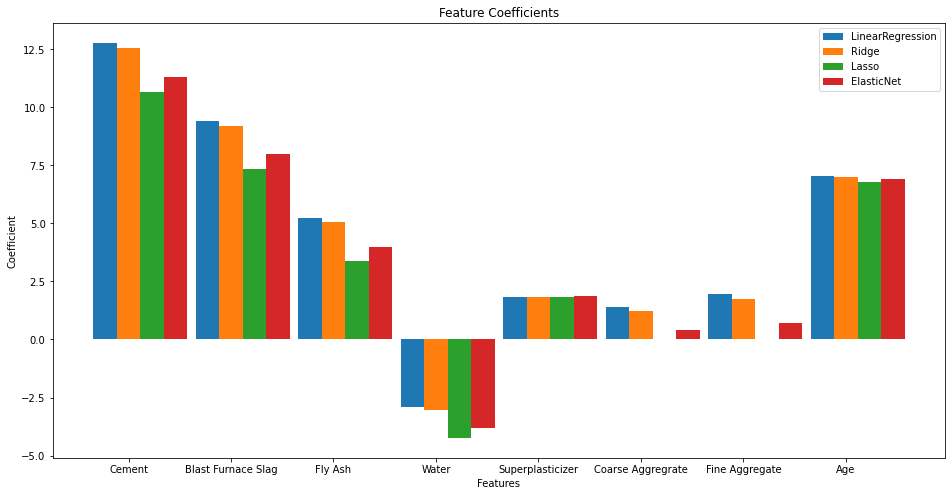

In [28]:
models = [lr, ridge, lasso, EN]

coefs_table = plot_coef(models)

In [29]:
coefs_table

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregrate,Fine Aggregate,Age
LinearRegression,12.786504,9.432883,5.255609,-2.892085,1.841103,1.400255,1.947380,7.037787
Ridge,12.559741,9.213632,5.061598,-3.038873,1.842780,1.248667,1.751912,7.018837
Lasso,10.643747,7.325940,3.374465,-4.244820,1.822631,-0.000000,0.023901,6.792964
ElasticNet,11.316240,8.007811,3.995934,-3.812620,1.860387,0.423782,0.689578,6.898392


As expected the behaviour between these models is similar since they are all linear regression models. However, some of our previous expectations of coefficients are displayed. The ridge model attempts to reduce the coefficients where possible. The lasso reduces them even further and even brings some down to 0 when necessary. Then finally, the elastic net lands somewhere in the middle.

Its time for the moment of truth, let's see the results of each model's predictions on the test set.

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
def make_pred (models, X_test, y_test):
    
    results = {}
    
    for model in models:
        y_pred = model.predict(X_test)
        results[type(model).__name__] = [mean_squared_error(y_test, y_pred)**(1/2), 
                                         mean_absolute_error(y_test, y_pred), 
                                         r2_score(y_test, y_pred)]
        
        results = pd.DataFrame(results, index=['RMSE','MAE','R2'])
        
    return results

In [34]:
make_pred(models, X_test, y_test).T

,RMSE,MAE,R2
LinearRegression,9.796708,7.745393,0.627542
Ridge,9.796411,7.751761,0.627564
Lasso,9.820901,7.828970,0.625700
ElasticNet,9.807203,7.795047,0.626743


Although all of our models have performed similarly, it depends on which scoring metric you look at the determine the overall winner. Let's explore the different scoring metrics.

#### Root Mean Square Error (RMSE)
RMSE is the square root of the error function that the regression algorithms are trying to reduce. It is an absolute measure of how well the model fits the data.

#### Mean Absolute Error (MAE)
Similarly to RMSE, MAE looks at the sum of the value of errors. However, since we are not squaring the value and instead taking the absolute value, it is more forgiving to large prediction errors.

#### R Square
R Square measures how much variability in a dependent variable can be explained by the model. It is a good metric to determine the fit on dependent variables. But, it does not take into consideration overfitting.

## Conclusion
Using machine learning models we have simulated the compressive strength of concrete using countless combinations of ingredients and aging process.

Through EDA we have discovered that cement, age and superplasticizer have a positive impact on the overall strength. Water is found to have a negative impact, but is often present in older concrete due to the curing processes.

After utilising linear regression models it has become evident that blast furnace slag is much more important than previously thought, and superplasticizer the opposite. These insights are not intuitive and could be profound and beneficial in a business context.

All of our linear regression models performed similarly in the scoring metrics and would all be suitable in a production environment for making further predictions and testing.

To improve, perhaps decision trees and ensemble methods could be used to increase the prediction score.

## Extras!

### Saving and Storing the Model
In this extra section we'll be 'pickling' our model and saving it as a file. In another script we'll use this model to create a simple web application to input our own values and receive a prediction.

In [35]:
import pickle

outfile = open('saved_model', 'wb')

pickle.dump(lr, outfile)

outfile.close()

### References

Data: https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength  
Concrete Testing: http://www.civilengineeringforum.me/compressive-strength-test-of-concrete/  
Scikit-learn: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html  
